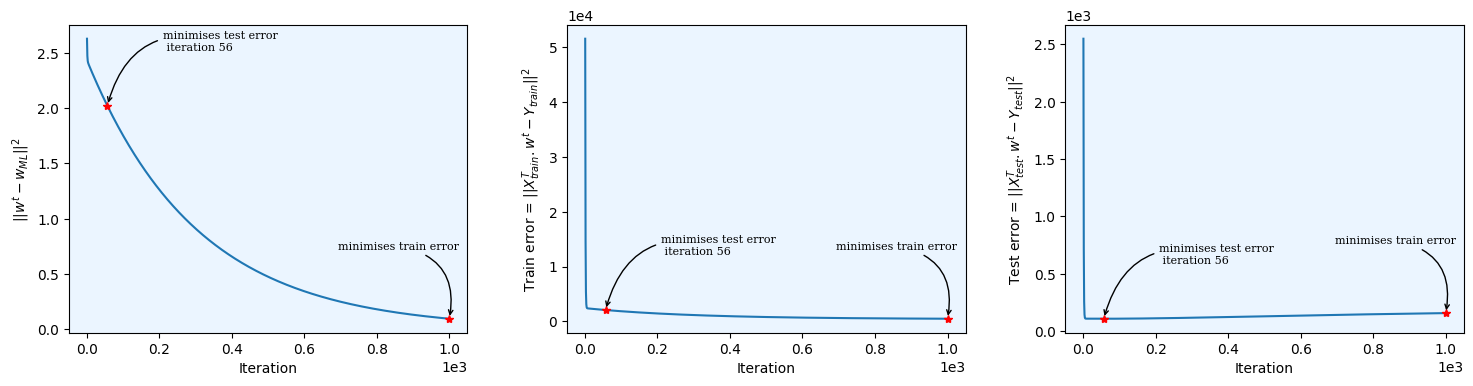

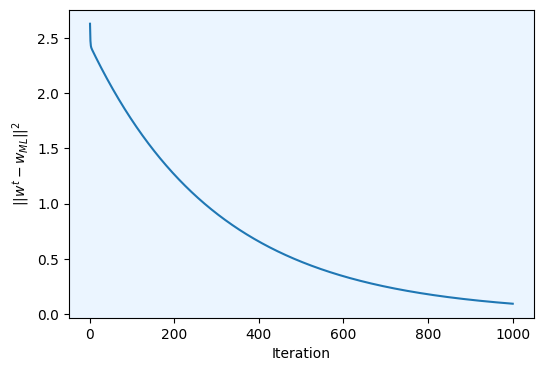

In [2]:
import numpy as np
import matplotlib.pyplot as plt

train_data = np.genfromtxt('A2Q2Data_train.csv', delimiter=',')
train_X = train_data[:, :100].T
train_Y = train_data[:, -1]
test_data = np.genfromtxt('A2Q2Data_test.csv', delimiter=',')
test_X = test_data[:, :100].T
test_Y = test_data[:, -1]
num_initialisations = 1
num_iterations = 1000
dimensions, num_points = train_X.shape 

w_ML = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X, train_X.T)), train_X), train_Y)
train_xxT, train_xy = np.matmul(train_X, train_X.T), np.matmul(train_X, train_Y)
def calculate_error(w, X, Y):
    return np.linalg.norm((np.matmul(X.T, w) - Y))**2

def step(t):
    return 1e-6

def gradient(w, XXT, XY):
    return np.array(2*(np.matmul(XXT, w) - XY))

w_sep = np.zeros(num_iterations)
train_errors = np.zeros(num_iterations)
test_errors = np.zeros(num_iterations)
w = np.zeros(dimensions)
for __ in range(num_iterations):
    w_sep[__] += np.linalg.norm((w - w_ML))**2
    train_errors[__] += calculate_error(w, train_X, train_Y)
    test_errors[__] += calculate_error(w, test_X, test_Y)
    w = w - step(__)*gradient(w, train_xxT, train_xy)

test_min_iter = np.argmin(test_errors)

x = np.linspace(1, num_iterations, num_iterations)
y = np.array([w_sep, train_errors, test_errors])
y_labels = [r"$||w^t - w_{ML}||^2$", r"Train error = $||X_{train}^T.w^t - Y_{train}||^2$", r"Test error = $||X_{test}^T.w^t - Y_{test}||^2$"]
annotations = ["minimises train error", "minimises test error\n iteration " + str(test_min_iter)]
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
plt.subplots_adjust(wspace=0.25)
for i, ax in enumerate(axes):
    ax.plot(x, y[i])
    ax.set_xlabel("Iteration")
    ax.set_ylabel(y_labels[i])
    ax.annotate(annotations[0], xy=(x[-1], y[i, -1]), xycoords='data', fontsize=8,
                xytext=(-80, +50), textcoords='offset points', family='serif',
                arrowprops=dict(arrowstyle='->', connectionstyle="arc3, rad=-.5"))
    ax.annotate(annotations[1], xy=(x[test_min_iter], y[i, test_min_iter]), xycoords='data', fontsize=8,
                xytext=(+40, +40), textcoords='offset points', family='serif',
                arrowprops=dict(arrowstyle='->', connectionstyle="arc3, rad=.5"))
    ax.plot(x[-1], y[i, -1], 'r*')
    ax.plot(x[test_min_iter], y[i, test_min_iter], 'r*')
    ax.ticklabel_format(scilimits=(-5, 3))
    ax.set_facecolor('#ebf5ff')
plt.savefig('images/Q2/grad_des_normal')
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(6, 4))
axes.plot(x, y[0])
axes.set_xlabel("Iteration")
axes.set_ylabel(y_labels[0])
axes.set_facecolor('#ebf5ff')
plt.savefig('images/Q2/grad_des_normal_fixstep')
plt.show()